In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:200% !important; }</style>"))

In [2]:
import sys
import numpy as np
sys.path.insert(0, '/Users/tigrank/Tigran/programming/cad_parser/bin/')

In [3]:
#driver.find_elements_by_xpath("//select[@name='ddlSearchType']/option[text()='Current Owner']")[0].click()

WARNING *** file size (11274442) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


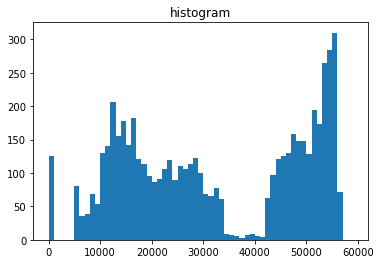

In [4]:
####### Jones county owner's range #######

from fetcher_jones import jones_import_ids
import matplotlib.pyplot as plt

fname = '/Users/tigrank/Tigran/programming/cad_parser/data/data_jones/appraisal_roll.xls'
owner_ids, property_ids = jones_import_ids(fname)
bins = np.arange(1, 60000, 1000)
plt.hist(owner_ids, bins = bins) 
plt.title("histogram") 
plt.show()

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/tigrank/Tigran/programming/cad_parser/output/output_jones/output_jones.csv')

props_line = '17930, 15779, 26413, 13453, 27995, 15120, 21493, 23067, 22238, 22578, \
                25043, 22661, 16837, 15626, 16064, 16717, 18107, 14756'
prop_ids   = props_line.split(',')
prop_ids   = list(map(lambda x: int(x.strip()), prop_ids))
df         = df[np.isin(df.prop_id.values, prop_ids)]

#manual fix of one wrong value
#idx        = df.index[df.prop_id==27222][0]
#if idx:
#    df.at[idx, 'land_area'] *= 4

In [10]:
np.sum(df.land_area)

5.054999999999998

In [11]:
len(df)

18

In [12]:
#df.land_area = (df.land_area*100).astype(int)/100
df['price'] = df['land_area']*8000
df.price = df.price.astype(int)

In [13]:
#df_sale = df[['prop_id', 'legal_description', 'prop_address', 'land_area', 'price', 'school']]
df_sale = df[['prop_id', 'legal_description', 'prop_address', 'land_area', 'school']]

In [14]:
#df_sale.style.hide_index()
df_sale

,prop_id,legal_description,prop_address,land_area,school
2712,13453,"HAMLIN TOWNSITE HAMLIN BLK 17, LOT 9",NaN,0.161,HAMLIN ISD I&S
3689,14756,"MCGAUGHY ANSON, BLOCK 2, LOT 1",NaN,0.172,ANSON ISD I&S
3951,15120,"NORTH HAMLIN HAMLIN, ALL BLK 12",NaN,2.066,HAMLIN ISD I&S
4361,15626,"HOOVER ANSON, BLOCK 4,, LOT 24 AND 26,",11TH,0.192,ANSON ISD I&S
4476,15779,"HAMLIN TOWNSITE HAMLIN BLK 35, LOT 10",NaN,0.161,HAMLIN ISD I&S
4706,16064,"HOOVER ANSON, BLOCK 4, LOT 28",11TH STREET,0.096,ANSON ISD I&S
5179,16717,"HOOVER ANSON, BLOCK 4, LOT 30,, 32,34",12TH STREET,0.289,ANSON ISD I&S
5254,16837,"HOOVER ANSON, BLOCK 3, LOT 20, AND 22",1622 11TH,0.193,ANSON ISD I&S
6022,17930,"ORIGINAL STAMFORD, BLOCK 38,, LOT 6",404 S BERTHELOT,0.189,STAMFORD ISD I&S
6161,18107,"SEARS ANSON, BLOCK 4,, LOT W/2 OF 4",NaN,0.161,ANSON ISD I&S


In [15]:
df_anson_cluster = df_sale[df_sale.school.str.startswith('ANSON') & (~df_sale.prop_id.isin(['28952', '14756']))]
np.sum(df_anson_cluster.land_area)

1.7

In [8]:
mobile_homes_line = '13453, 14756, 15779, 21493, 26413, 27222, 27995, 28952'
prop_ids   = mobile_homes_line.split(',')
prop_ids   = list(map(lambda x: int(x.strip()), prop_ids))
df_mh      = df_sale[(np.isin(df_sale.prop_id.values, prop_ids)) | (df_sale.school.values=='HAMLIN ISD I&S')]
df_mh[['prop_id', 'legal_description', 'land_area', 'school']]

,prop_id,legal_description,land_area,school
2712,13453,"HAMLIN TOWNSITE HAMLIN BLK 17, LOT 9",0.161,HAMLIN ISD I&S
3689,14756,"MCGAUGHY ANSON, BLOCK 2, LOT 1",0.172,ANSON ISD I&S
3951,15120,"NORTH HAMLIN HAMLIN, ALL BLK 12",2.066,HAMLIN ISD I&S
4476,15779,"HAMLIN TOWNSITE HAMLIN BLK 35, LOT 10",0.161,HAMLIN ISD I&S
8559,21493,"SOUTHSIDE STAMFORD, BLOCK 3, LOT 3 AND N/2 OF 4",0.284,STAMFORD ISD I&S
11749,26413,"HAMLIN TOWNSITE HAMLIN BLK 35, LOT S 42 OF 3 ...",0.161,HAMLIN ISD I&S
12281,27222,"HAMLIN TOWNSITE HAMLIN BLK 60, LOT 1-4",0.644,HAMLIN ISD I&S
12819,27995,"HAMLIN TOWNSITE HAMLIN BLK 55, LOT 9",0.161,HAMLIN ISD I&S
13491,28952,"MCGAUGHY ANSON, BLOCK 10, LOT, 7",0.172,ANSON ISD I&S


In [13]:
df_mh[(df_mh.school.values=='HAMLIN ISD I&S') & (df_mh.prop_id !=15120 )][['prop_id', 'legal_description', 'land_area', 'school']]

,prop_id,legal_description,land_area,school
2712,13453,"HAMLIN TOWNSITE HAMLIN BLK 17, LOT 9",0.161,HAMLIN ISD I&S
4476,15779,"HAMLIN TOWNSITE HAMLIN BLK 35, LOT 10",0.161,HAMLIN ISD I&S
11749,26413,"HAMLIN TOWNSITE HAMLIN BLK 35, LOT S 42 OF 3 ...",0.161,HAMLIN ISD I&S
12281,27222,"HAMLIN TOWNSITE HAMLIN BLK 60, LOT 1-4",0.644,HAMLIN ISD I&S
12819,27995,"HAMLIN TOWNSITE HAMLIN BLK 55, LOT 9",0.161,HAMLIN ISD I&S


**TESTING**

In [28]:
import os, time, requests, datetime, contextlib, argparse
import regex as re
from cad_lib import isnotebook, ROOT_DIR

HTTP_ATTEMPTS = 1000
URL_HEAD = {
            'prop' : 'https://iswdataclient.azurewebsites.net/webProperty.aspx?dbkey=TOMGREENCAD',
            'tax'  : 'https://iswdataclient.azurewebsites.net/webPropertyTaxes.aspx?dbkey=TOMGREENCAD'
           }

if isnotebook():
    from tqdm.notebook import tqdm, trange
else:
    from tqdm import tqdm, trange

def get_headers(url=URL_HEAD['prop']):
    session         = requests.Session()
    response        = session.get(url)
    session_cookies = session.cookies.get_dict()
    cookie_string   = '; '.join([f'{key}={session_cookies[key]}' for key in session_cookies])
    headers         = {
                          'cookie': cookie_string,
                          'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'
                      }
    return headers


if __name__ == '__main__':

    data_folder = f'{ROOT_DIR}/data/data_tomgreen'
    
    os.makedirs(data_folder, exist_ok=True) 
    headers = get_headers()

    if isnotebook():
        begin_id, end_id = 1, 500
    else:
        parser = argparse.ArgumentParser(description='Fetcher range')
        parser.add_argument('-begin_id', type=int, help='starting id', required=False, default=1)
        parser.add_argument('-end_id', type=int, help='ending id', required=False, default=110000)
        args = parser.parse_args()
        begin_id, end_id = args.begin_id, args.end_id
    
    for prop_id in trange(begin_id, end_id):
        for key in URL_HEAD.keys():
            url   = f'{URL_HEAD[key]}&id=R{prop_id:09d}'
            fname = f'{data_folder}/{key}_{prop_id:09d}.html'

            # Handling stale sessions
            for trial in range(HTTP_ATTEMPTS):
                response = requests.get(url, headers=headers)

                if response.ok:
                    break

                if trial==HTTP_ATTEMPTS-1:
                    raise Exception(f'Connection timeout at prop_id={prop_id}')

                time.sleep(1)
                headers  = get_headers()

            if re.findall('id=\"ucidentification_webprop_id\"[^>]*>&nbsp;<', response.text):
                with contextlib.suppress(FileNotFoundError): # delete file, if property was removed from the county website
                    os.remove(fname)
            else:
                with open(fname, 'wb') as f:
                    f.write(response.content)